In [52]:

import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [53]:
print(tf.__version__)
print(tf.keras.__version__)


2.20.0
3.13.1


In [54]:
dir (datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [55]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

C:\ProgramData\anaconda3\envs\K_DL_Jan_2025\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [56]:
X_train.shape

(50000, 32, 32, 3)

In [57]:
X_test.shape

(10000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [60]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [61]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print (classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [62]:
print (y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [63]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [64]:
y_train = y_train.reshape(-1,)
print (y_train)


[6 9 9 ... 9 1 1]


In [65]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


None


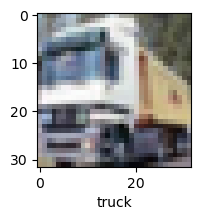

In [66]:
print (plot_sample(X_train, y_train, 1))

None


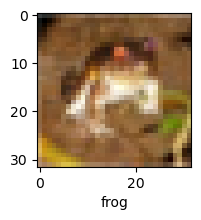

In [35]:
print (plot_sample(X_train, y_train, 0))

None


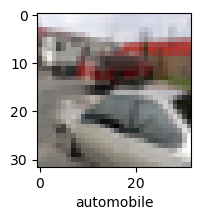

In [72]:
print (plot_sample(X_train, y_train, 49999))

In [37]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [40]:
32*32*3

3072

In [41]:

ann = models.Sequential([
        layers.Input(shape=(32,32,3)) ,
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:

ann.fit(x=X_train,      y=y_train, 
          epochs=7,  validation_data=(X_test, y_test), verbose=1   )


Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 134ms/step - accuracy: 0.3542 - loss: 1.8138 - val_accuracy: 0.3972 - val_loss: 1.7060
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.4273 - loss: 1.6224 - val_accuracy: 0.4351 - val_loss: 1.5856
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4552 - loss: 1.5403 - val_accuracy: 0.4595 - val_loss: 1.5426
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4776 - loss: 1.4811 - val_accuracy: 0.4597 - val_loss: 1.5162
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4970 - loss: 1.4294 - val_accuracy: 0.4096 - val_loss: 1.6564
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5145 - loss: 1.3875 - val_accuracy: 0.4481 - val_loss: 1.5494
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5234 - loss: 1.3486 - val_accuracy: 0.4915 - val_loss: 1.4328


In [43]:
print  (ann.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,012 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [44]:
y_pred = ann.predict (X_test)
print (y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[0.30576926 0.7000666  0.6521361  ... 0.03442346 0.6470146  0.13601305]
 [0.6517228  0.9734361  0.17580089 ... 0.03164341 0.9899656  0.9905367 ]
 [0.95620584 0.9389267  0.22963922 ... 0.08153109 0.99052066 0.9647522 ]
 ...
 [0.06789331 0.0492175  0.8371221  ... 0.6485401  0.3980182  0.16826771]
 [0.4027077  0.23216422 0.79070926 ... 0.4737913  0.1638668  0.20205237]
 [0.5268083  0.37390062 0.46985587 ... 0.81654    0.4032486  0.46205032]]


In [45]:

from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Accuracy: \n",accuracy_score (y_test,y_pred_classes))
print ()
print("Confusion Matrix: \n",confusion_matrix (y_test,y_pred_classes))
print ()        
print("Classification Report: \n", classification_report(y_test, y_pred_classes,zero_division = 0))


Accuracy: 
 0.4915

Confusion Matrix: 
 [[441  45  21  25  32   3  51  16 291  75]
 [ 13 654   1  13   8   7  32  16  99 157]
 [ 72  28 166  89 198  41 260  48  64  34]
 [ 29  42  23 293  70 102 262  43  57  79]
 [ 43  21  30  39 444  20 263  49  60  31]
 [ 16  29  25 215  82 247 218  68  49  51]
 [  4  20   7  38  84  11 772  16  25  23]
 [ 25  28  27  55  73  37  89 495  48 123]
 [ 30  41   1  17  18   5  26   7 785  70]
 [  7 178   5  24   8   7  41  13  99 618]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.53      1000
           1       0.60      0.65      0.63      1000
           2       0.54      0.17      0.25      1000
           3       0.36      0.29      0.32      1000
           4       0.44      0.44      0.44      1000
           5       0.51      0.25      0.33      1000
           6       0.38      0.77      0.51      1000
           7       0.64      0.49      0.56      1000
           8    

In [ ]:

import matplotlib.pyplot as plt
from keras import datasets
import numpy as np



In [46]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [50]:
ann.predict (X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.30576923, 0.7000668 , 0.6521361 , 0.9072943 , 0.4772653 ,
        0.74701583, 0.82736504, 0.03442334, 0.6470146 , 0.13601305]],
      dtype=float32)

In [51]:
 ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [70]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

None


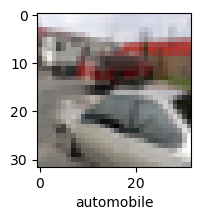

In [73]:
print (plot_sample(X_train, y_train, 49999))

In [76]:
y_test= y_test.reshape(-1,)
print (y_train)

[6 9 9 ... 9 1 1]


None


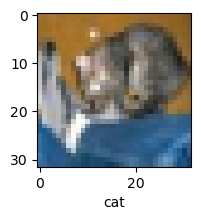

In [77]:
print (plot_sample(X_test, y_test, 0))

In [75]:
y_test[0]

array([3], dtype=uint8)

In [69]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print (classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
